In [1]:
import sys
sys.path.append('/home/ZhiLi/CRESTHH')
from cresthh.UQ.DoE import morris_oat
from cresthh.UQ.util import scale_samples_general, read_param_file, discrepancy
from cresthh.UQ.analyze import *

In [38]:
pf= read_param_file('params.txt')

In [40]:
pf

{'bounds': [[0.0, 1.0]], 'names': ['friction'], 'num_vars': 1}

In [43]:
param_values= morris_oat.sample(10, pf['num_vars'], num_levels=10, grid_jump=1, plot=False)

In [46]:
param_values.shape

(20, 1)

In [10]:
scale_samples_general(param_values, pf['bounds'])

np.savetxt('Input_params.txt', param_values, delimiter=' ')

In [29]:
with open('Output_Sobol.txt','r') as f:
    outputs= f.readlines()
with open('Input_params.txt','r') as f:
    inputs= f.readlines()    
# with open('params.txt','r') as f:
#     params= f.readlines()    

In [32]:
with open('Output_new.txt', 'w') as f:
    for i in range(160):
        f.write(outputs[i])
with open('Input_new.txt', 'w') as f:
    for i in range(160):
        f.write(inputs[i])
# with open('params_new.txt', 'w') as f:
#     for i in range(140):
#         f.write(params[i])

In [2]:
# plt.figure(figsize=(15,10))
_fric_mu, _fric_sigma, _fric_conf= morris.analyze('params.txt', 'Input_params.txt', 'Output_Sobol.txt',column = 0, plot=False)

Parameter  Mu  Sigma  Mu_Star  Mu_Star_Conf
friction -0.057703 0.099492 0.057703 0.061775


In [3]:
mu_star_x, sigma_y, mu_star_conf_z= morris.analyze('params_expF.txt', 'Input_expF.txt', 'Output_expF.txt',column = 0, plot=False)

Parameter  Mu  Sigma  Mu_Star  Mu_Star_Conf
friction 0.000000 0.000000 0.000000 0.000000
SM 0.094048 0.032568 0.094048 0.014057
Ksat -0.000195 0.000631 0.000195 0.000272
WM -0.000213 0.000746 0.000213 0.000333
B 0.000030 0.000119 0.000030 0.000050
IM 0.000488 0.001169 0.000488 0.000509
KE -0.000179 0.000102 0.000182 0.000044


In [4]:
mu_star_x[0]= _fric_mu
sigma_y[0]= _fric_sigma
mu_star_conf_z[0]= _fric_conf

In [5]:
mu_star_conf_z.shape

(7, 1000)

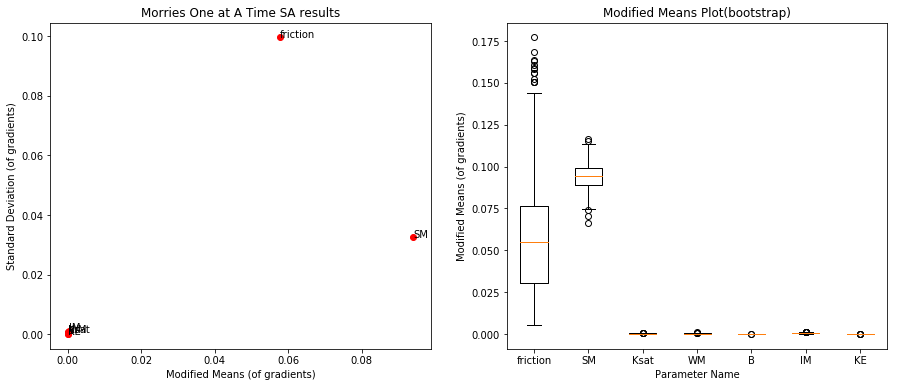

In [6]:
param_file= read_param_file('params_expF.txt')
D= len(mu_star_x)
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot(121)
for i in range(D):
    plt.plot(mu_star_x[i], sigma_y[i], 'ro')
    plt.text(mu_star_x[i], sigma_y[i], '%s' % param_file['names'][i])
plt.title('Morries One at A Time SA results') 
plt.xlabel('Modified Means (of gradients)')       
plt.ylabel('Standard Deviation (of gradients)')
ax1=plt.subplot(122)
# mu_star_conf_z = mu_star_conf_z.T
ax1.boxplot([conf for conf in mu_star_conf_z])
ax1.set_xticks(np.arange(param_file['num_vars'])+1)
ax1.set_xticklabels(param_file['names'])
plt.title('Modified Means Plot(bootstrap)')
plt.xlabel('Parameter Name')
plt.ylabel('Modified Means (of gradients)')
plt.show();